In [29]:
import numpy as np
import tensorflow as tf

In [30]:
print(tf.__version__)        # TensorFlow version
print(tf.keras.__version__)  # Keras version (bundled with TensorFlow)

2.17.1
3.7.0


In [31]:
# Setup the seed generators
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [32]:
# Load some train image as an example
from tensorflow.keras.preprocessing.image import load_img

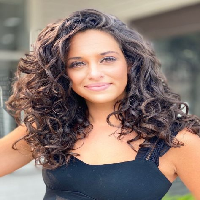

In [33]:
path = './data/train/curly'
name = '5d6da4c89b006262ecfab1f48c5e197f (3).jpg'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(200, 200))
img

In [34]:
x = np.array(img)
x.shape

(200, 200, 3)

### Convolutional neural network

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.optimizers import SGD

In [36]:
# Define the model
model = Sequential([
    Input(shape=(200, 200, 3)),  # Input layer with shape (200, 200, 3)
    
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification, hence 'sigmoid'
])

# Compile the model
optimizer = SGD(learning_rate=0.002, momentum=0.8)  # SGD optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary to verify
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 313632)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │    20,072,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Reading data with ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [38]:
train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    './data/train',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 800 images belonging to 2 classes.


In [39]:
test_gen = ImageDataGenerator(rescale=1./255)

test_ds = test_gen.flow_from_directory(
    './data/test',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 201 images belonging to 2 classes.


In [40]:
# Train the model and store the history
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

/home/jdanussi/.local/share/virtualenvs/ml-zoomcamp-2024-hqoZ-vrx/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 41s 959ms/step - accuracy: 0.5270 - loss: 0.7361 - val_accuracy: 0.5672 - val_loss: 0.6617
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 547ms/step - accuracy: 0.6310 - loss: 0.6246 - val_accuracy: 0.6318 - val_loss: 0.6355
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 750ms/step - accuracy: 0.6520 - loss: 0.6062 - val_accuracy: 0.6269 - val_loss: 0.6178
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 29s 719ms/step - accuracy: 0.7008 - loss: 0.5768 - val_accuracy: 0.6070 - val_loss: 0.7254
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 562ms/step - accuracy: 0.6781 - loss: 0.5996 - val_accuracy: 0.6368 - val_loss: 0.6327
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 632ms/step - accuracy: 0.7080 - loss: 0.5662 - val_accuracy: 0.6219 - val_loss: 0.6346
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 753ms/step - accuracy: 0.7401 - loss: 0.5243 - val_accuracy: 0.6119 - val_loss: 0.6974
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 38s 652ms/step - accuracy: 0.7150 - loss: 0.5610 - val_accu

In [41]:
# Extract training accuracy for each epoch
training_accuracies = history.history['accuracy']

# Compute the median of training accuracy
median_training_accuracy = np.median(training_accuracies)

# Print the median training accuracy
print(f"The median of training accuracy for all epochs is: {median_training_accuracy:.2f}")

The median of training accuracy for all epochs is: 0.71


In [42]:
# Extract training loss for each epoch
training_losses = history.history['loss']

# Compute the standard deviation of training loss
std_training_loss = np.std(training_losses)

# Print the standard deviation of training loss
print(f"The standard deviation of training loss for all epochs is: {std_training_loss:.3f}")

The standard deviation of training loss for all epochs is: 0.058


In [43]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
    )

train_ds = train_gen.flow_from_directory(
    './data/train',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 800 images belonging to 2 classes.


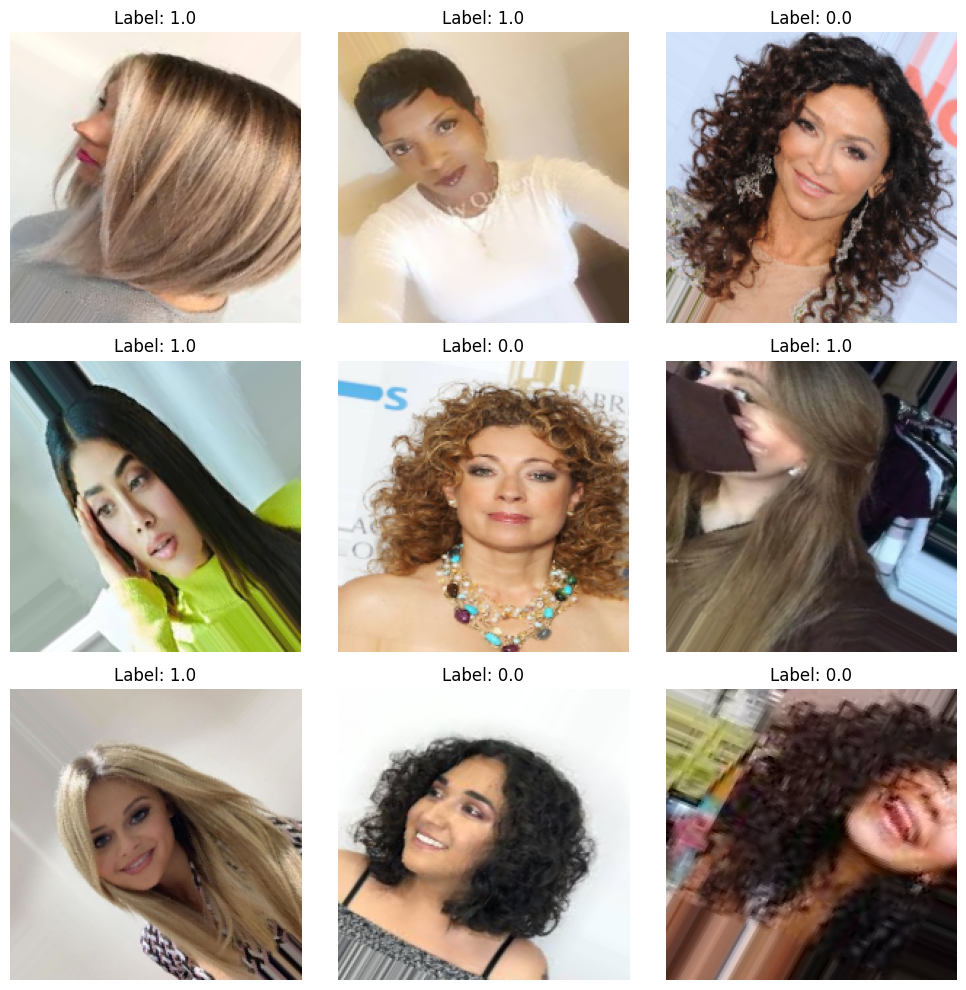

In [25]:
import matplotlib.pyplot as plt

# Get one batch of augmented images and labels from train_ds
images, labels = next(train_ds)

# Function to display a grid of images
def display_augmented_images(images, labels, num_images=9):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)  # 3x3 grid
        plt.imshow(images[i])  # Show image
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display a sample of 9 augmented images
display_augmented_images(images, labels)


In [45]:
# Train again but with augmentations 
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

/home/jdanussi/.local/share/virtualenvs/ml-zoomcamp-2024-hqoZ-vrx/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.6140 - loss: 0.6624 - val_accuracy: 0.6816 - val_loss: 0.5959
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.6677 - loss: 0.6043 - val_accuracy: 0.6915 - val_loss: 0.6108
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.6636 - loss: 0.6119 - val_accuracy: 0.6716 - val_loss: 0.5837
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 36s 899ms/step - accuracy: 0.6512 - loss: 0.5986 - val_accuracy: 0.7065 - val_loss: 0.5769
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 38s 948ms/step - accuracy: 0.6526 - loss: 0.6174 - val_accuracy: 0.6915 - val_loss: 0.5779
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 32s 737ms/step - accuracy: 0.6503 - loss: 0.6117 - val_accuracy: 0.6716 - val_loss: 0.5808
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 39s 986ms/step - accuracy: 0.6770 - loss: 0.5959 - val_accuracy: 0.7114 - val_loss: 0.5788
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.6576 - loss: 0.6155 - val_accuracy: 0.6965

In [46]:
# Extract validation loss for all epochs
val_losses = history.history['val_loss']

# Compute the mean of validation loss for all epochs
mean_val_loss = np.mean(val_losses)

# Print the mean validation loss
print(f"The mean test loss for all epochs is: {mean_val_loss:.2f}")

The mean test loss for all epochs is: 0.58


In [47]:
# Extract validation accuracy for all epochs
val_accuracies = history.history['val_accuracy']

# Slice the last 5 epochs (epochs 6 to 10, index 5 to 9)
last_5_val_accuracies = val_accuracies[5:10]

# Compute the average of the last 5 validation accuracies
average_val_accuracy = np.mean(last_5_val_accuracies)

# Print the average validation accuracy
print(f"The average test accuracy for the last 5 epochs is: {average_val_accuracy:.2f}")

The average test accuracy for the last 5 epochs is: 0.70
